## Dastgyr - Data Analysis Case Study

### Roadmap

    1. Q1 
    2. Q2 
    3. Q3  
    4. Extra EDA 

    >> Every Question approach
        a. Read Data
        b. Check missing values
        c. Data preprocessing
        d. Solve Questions
        
 * NOTE: Cannot use imputation techniques on missing data because mostly there are ref codes and ids are missing. 

In [245]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

!pip install missingno
import missingno as msno
%matplotlib inline

In [3]:
#checking files
!ls

Dastgyr -  Data Analysis.ipynb
Data
SQL.pdf
SQLQuery1.sql
ScreenShots


In [30]:
retailer_df = pd.read_csv('E:\Dastgyr\Data\Retailers.csv')
salesAgent_df = pd.read_csv('E:\Dastgyr\Data\SalesAgentsOrders.csv')
users_df = pd.read_csv(r'E:\Dastgyr\Data\Users.csv', encoding='utf-8')
order_df = pd.read_csv('E:\Dastgyr\Data\Orders.csv')

In [8]:
users_df.head()

,ID,Name,Gender,Is Active,Is Verify,Created At,Refer By,Refer At,Ref Code
0,57769,Basit rauf,NaN,True,True,2020-10-30,NaN,NaN,211570.0
1,57768,Kashif ali,NaN,True,False,2020-10-30,NaN,NaN,576407.0
2,57767,Saad,NaN,True,False,2020-10-30,NaN,NaN,527788.0
3,57766,muhammad nadeem,NaN,True,False,2020-10-30,NaN,NaN,297608.0
4,57762,Faheem Sajid,NaN,True,True,2020-10-30,NaN,NaN,218846.0


In [11]:
retailer_df.head()

,id,user_id,city_id,is_smartphone,sub_area_id,area_id
0,1,16,2,True,NaN,NaN
1,13536,21867,2,True,1324.0,67.0
2,10698,14979,2,True,NaN,NaN
3,11,26,2,True,NaN,NaN
4,13566,21891,2,True,1326.0,82.0


In [10]:
salesAgent_df.head()

,id,order_id,agent_user_id
0,6715,188049,20773
1,5191,176219,47070
2,4367,167133,46908
3,4385,167219,46908
4,4431,167419,44736


In [31]:
order_df.head()

,ID,User ID,Order Number,Invoice Number,Note,Status,Created At,Wallet ID,Created By,Coupon ID
0,151171,911,001_1617235817562,NaN,NaN,5,2020-10-01T00:10:17.564998Z,NaN,NaN,NaN
1,151172,12255,001_1617236950240,NaN,NaN,5,2020-10-01T00:29:10.240569Z,NaN,NaN,NaN
2,151173,50075,001_1617237068661,NaN,NaN,6,2020-10-01T00:31:08.661829Z,NaN,NaN,NaN
3,151174,47559,001_1617237299995,NaN,NaN,5,2020-10-01T00:35:00.004953Z,NaN,NaN,NaN
4,151175,19306,002_1617237359398,NaN,NaN,5,2020-10-01T00:35:59.39855Z,NaN,NaN,NaN


## Data Preprocessing

In [12]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31880 entries, 0 to 31879
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          31880 non-null  int64  
 1   Name        31864 non-null  object 
 2   Gender      0 non-null      float64
 3   Is Active   31880 non-null  bool   
 4   Is Verify   31880 non-null  bool   
 5   Created At  31880 non-null  object 
 6   Refer By    8563 non-null   float64
 7   Refer At    8034 non-null   object 
 8   Ref Code    24395 non-null  float64
dtypes: bool(2), float64(3), int64(1), object(3)
memory usage: 1.8+ MB


In [13]:
#drop gender column because all values are null
users_df.drop(['Gender'], axis=1, inplace=True)

In [15]:
users_df.columns

Index(['ID', 'Name', 'Is Active', 'Is Verify', 'Created At', 'Refer By',
       'Refer At', 'Ref Code'],
      dtype='object')

<AxesSubplot:title={'center':'Number of Missing Values'}>

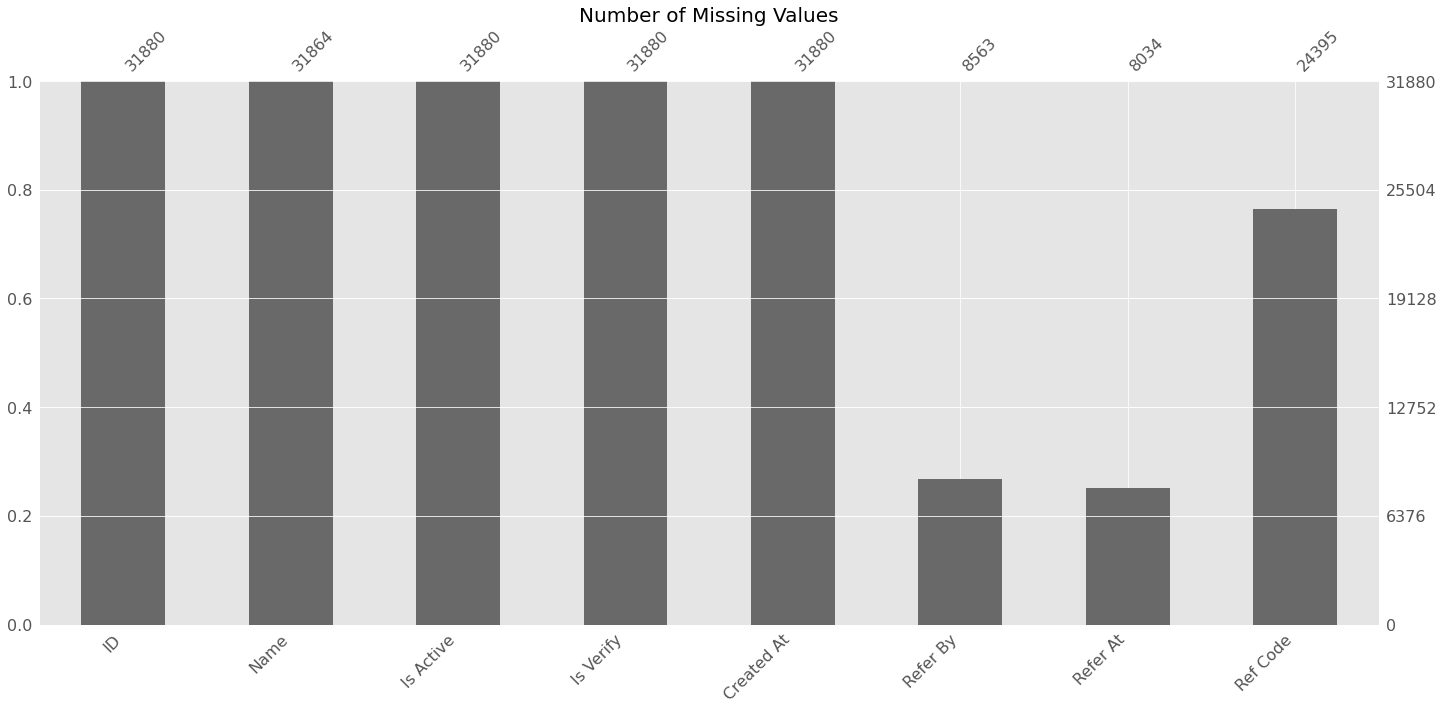

In [22]:
plt.title("Number of Missing Values", fontsize=20)
msno.bar(users_df)

In [23]:
salesAgent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             4141 non-null   int64
 1   order_id       4141 non-null   int64
 2   agent_user_id  4141 non-null   int64
dtypes: int64(3)
memory usage: 97.2 KB


<AxesSubplot:title={'center':'Number of Missing Values'}>

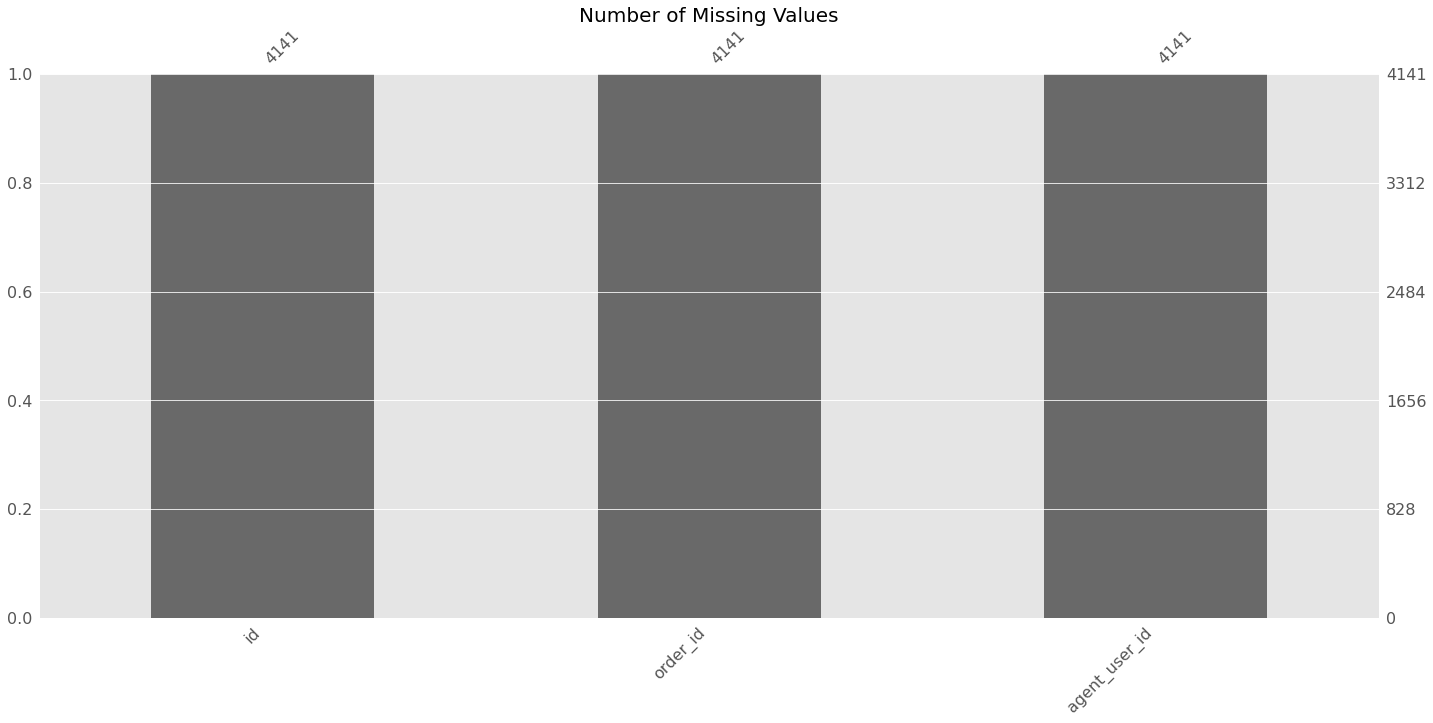

In [24]:
plt.title("Number of Missing Values", fontsize=20)
msno.bar(salesAgent_df)

* There is no missing value in sales Agent dataframe

In [25]:
retailer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31062 entries, 0 to 31061
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             31062 non-null  int64  
 1   user_id        31062 non-null  int64  
 2   city_id        31062 non-null  int64  
 3   is_smartphone  31062 non-null  bool   
 4   sub_area_id    29188 non-null  float64
 5   area_id        30523 non-null  float64
dtypes: bool(1), float64(2), int64(3)
memory usage: 1.2 MB


<AxesSubplot:title={'center':'Number of Missing Values'}>

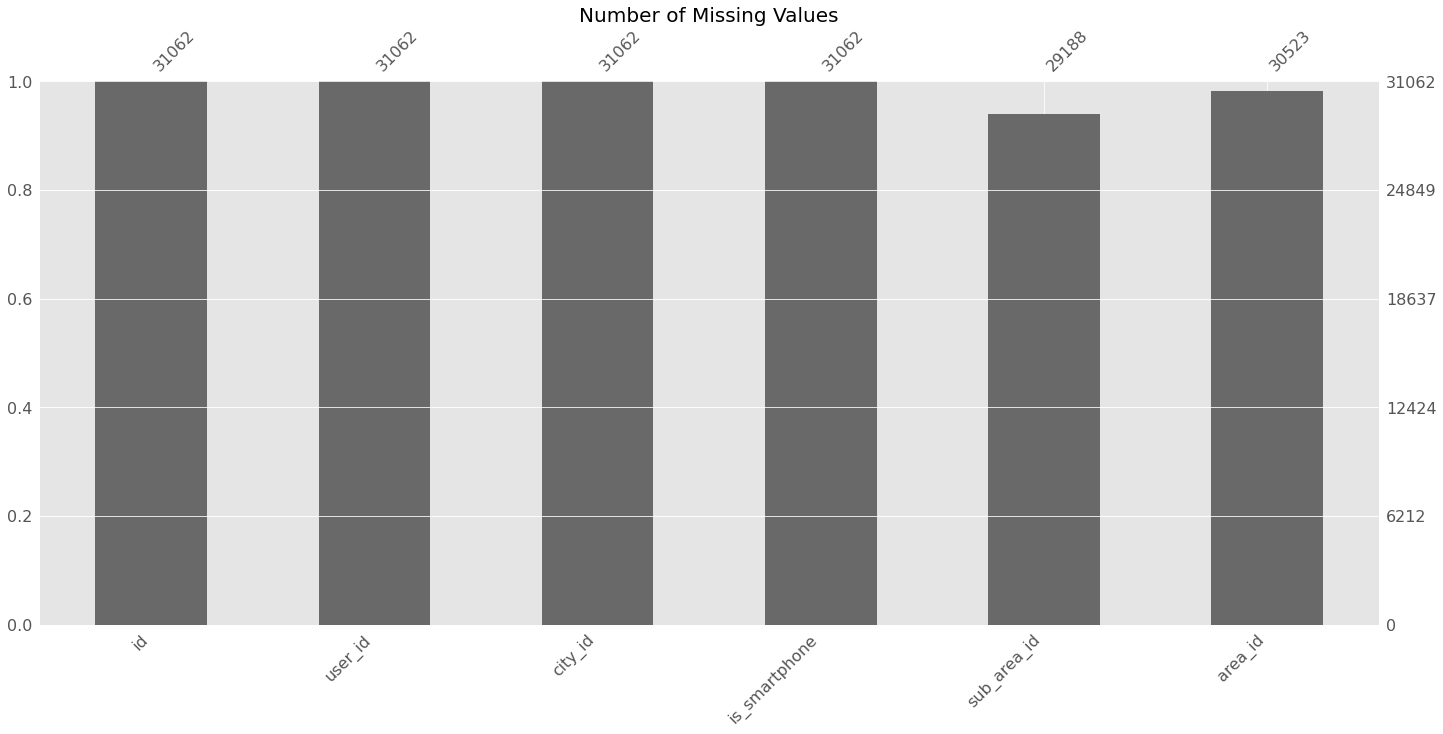

In [26]:
plt.title("Number of Missing Values", fontsize=20)
msno.bar(retailer_df)

In [32]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38307 entries, 0 to 38306
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              38307 non-null  int64  
 1   User ID         38307 non-null  int64  
 2   Order Number    38307 non-null  object 
 3   Invoice Number  0 non-null      float64
 4   Note            0 non-null      float64
 5   Status          38307 non-null  int64  
 6   Created At      38307 non-null  object 
 7   Wallet ID       41 non-null     float64
 8   Created By      131 non-null    float64
 9   Coupon ID       1 non-null      float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.9+ MB


In [33]:
order_df.drop(['Invoice Number', 'Note'], axis=1, inplace=True)

<AxesSubplot:title={'center':'Number of Missing Values'}>

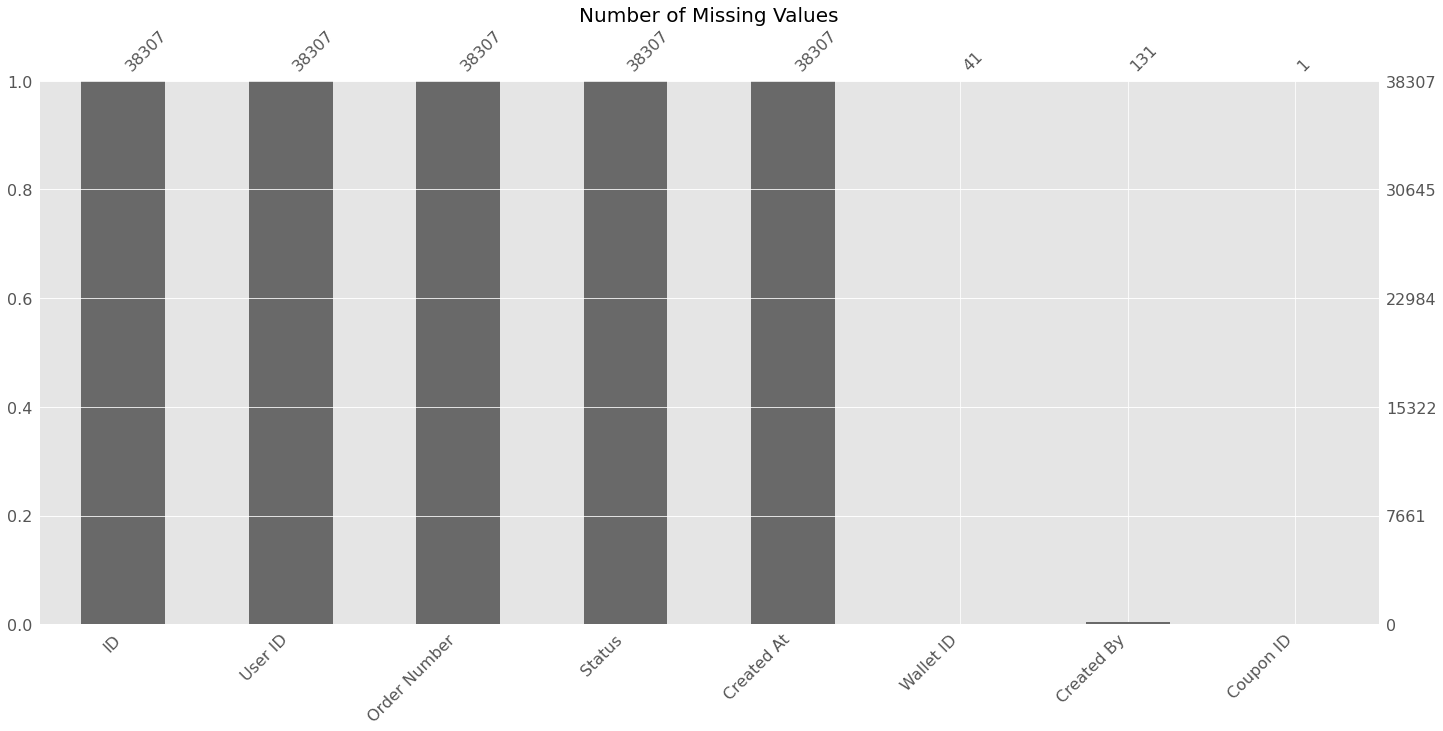

In [35]:
plt.title('Number of Missing Values', fontsize=20)
msno.bar(order_df)

## Q1
We’re planning to put our sales agents (order booking / onboardings) into 5 separate
teams and promote 5 people to lead each team. Which 5 agents should we pick for
this? Should we split teams separately for onboarding and order booking or should
we keep them the same and dynamic?
a. Note that the performance of agents would be based on two fronts:
i. Onboardings/Signups on Dastgyr’s Retailer app using referral code of
the agent
ii. Orders placed by customers through referral code of the agent

In [27]:
users_df.head()

,ID,Name,Is Active,Is Verify,Created At,Refer By,Refer At,Ref Code
0,57769,Basit rauf,True,True,2020-10-30,NaN,NaN,211570.0
1,57768,Kashif ali,True,False,2020-10-30,NaN,NaN,576407.0
2,57767,Saad,True,False,2020-10-30,NaN,NaN,527788.0
3,57766,muhammad nadeem,True,False,2020-10-30,NaN,NaN,297608.0
4,57762,Faheem Sajid,True,True,2020-10-30,NaN,NaN,218846.0


In [39]:
order_df.head()

,ID,User ID,Order Number,Status,Created At,Wallet ID,Created By,Coupon ID
0,151171,911,001_1617235817562,5,2020-10-01T00:10:17.564998Z,NaN,NaN,NaN
1,151172,12255,001_1617236950240,5,2020-10-01T00:29:10.240569Z,NaN,NaN,NaN
2,151173,50075,001_1617237068661,6,2020-10-01T00:31:08.661829Z,NaN,NaN,NaN
3,151174,47559,001_1617237299995,5,2020-10-01T00:35:00.004953Z,NaN,NaN,NaN
4,151175,19306,002_1617237359398,5,2020-10-01T00:35:59.39855Z,NaN,NaN,NaN


In [55]:
#convert float values into int
users_df['Refer By'] = users_df['Refer By'].fillna(0)
users_df['Refer By'] = users_df['Refer By'].astype(int)

users_df['Ref Code'] = users_df['Ref Code'].fillna(0)
users_df['Ref Code'] = users_df['Ref Code'].astype(int)

users_df.head()

,ID,Name,Gender,Is Active,Is Verify,Created At,Refer By,Refer At,Ref Code
0,57769,Basit rauf,NaN,True,True,2020-10-30,0,NaN,211570
1,57768,Kashif ali,NaN,True,False,2020-10-30,0,NaN,576407
2,57767,Saad,NaN,True,False,2020-10-30,0,NaN,527788
3,57766,muhammad nadeem,NaN,True,False,2020-10-30,0,NaN,297608
4,57762,Faheem Sajid,NaN,True,True,2020-10-30,0,NaN,218846


In [68]:
users_df.rename(columns = {'ID':'User ID'}, inplace = True)

,User ID,Name,Gender,Is Active,Is Verify,Created At,Refer By,Refer At,Ref Code
0,57769,Basit rauf,NaN,True,True,2020-10-30,0,NaN,211570
1,57768,Kashif ali,NaN,True,False,2020-10-30,0,NaN,576407
2,57767,Saad,NaN,True,False,2020-10-30,0,NaN,527788
3,57766,muhammad nadeem,NaN,True,False,2020-10-30,0,NaN,297608
4,57762,Faheem Sajid,NaN,True,True,2020-10-30,0,NaN,218846
5,57760,Sumair ahmed,NaN,True,True,2020-10-30,0,NaN,545025
6,57757,Abdullah Fahad,NaN,True,True,2020-10-30,0,NaN,445237
7,57756,Zameer,NaN,True,False,2020-10-30,0,NaN,83873
8,57751,Aziz ur rehman,NaN,True,False,2020-10-30,0,NaN,80611
9,57750,Illahi Bux,NaN,True,False,2020-10-30,0,NaN,334991


In [69]:
order_df.head()

,ID,User ID,Order Number,Status,Created At,Wallet ID,Created By,Coupon ID
0,151171,911,001_1617235817562,5,2020-10-01T00:10:17.564998Z,NaN,NaN,NaN
1,151172,12255,001_1617236950240,5,2020-10-01T00:29:10.240569Z,NaN,NaN,NaN
2,151173,50075,001_1617237068661,6,2020-10-01T00:31:08.661829Z,NaN,NaN,NaN
3,151174,47559,001_1617237299995,5,2020-10-01T00:35:00.004953Z,NaN,NaN,NaN
4,151175,19306,002_1617237359398,5,2020-10-01T00:35:59.39855Z,NaN,NaN,NaN


In [71]:
# Create inner join between users and order table based on User ID
usersOrder_df = pd.merge(users_df, order_df, on='User ID')
usersOrder_df.head()

,User ID,Name,Gender,Is Active,Is Verify,Created At_x,Refer By,Refer At,Ref Code,ID,Order Number,Status,Created At_y,Wallet ID,Created By,Coupon ID
0,57733,Hammad,NaN,True,True,2020-10-30,47070,2021-04-30T12:20:53.238002Z,751190,189094,002_1619785490597,5,2020-10-30T12:24:50.599852Z,NaN,NaN,NaN
1,57732,Farooq,NaN,True,True,2020-10-30,47070,2021-04-30T12:07:57.603537Z,988295,189078,002_1619784581662,5,2020-10-30T12:09:41.665483Z,NaN,NaN,NaN
2,57729,Busharat,NaN,True,True,2020-10-30,47070,2021-04-30T11:58:13.085699Z,129066,189067,002_1619784054103,5,2020-10-30T12:00:54.105883Z,NaN,NaN,NaN
3,57728,Shoaib,NaN,True,True,2020-10-30,46908,2021-04-30T11:57:21.168934Z,742971,189092,002_1619785446851,6,2020-10-30T12:24:06.856297Z,NaN,NaN,NaN
4,57727,Nazir,NaN,True,True,2020-10-30,19311,2021-04-30T11:46:08.618399Z,240229,189055,002_1619783440924,5,2020-10-30T11:50:40.926901Z,NaN,NaN,NaN


In [72]:
usersOrder_df.shape

(38307, 16)

### Approach
* Create inner join Orders placed by customers through referral code of the agent
     - Make 5 groups
     - Identify Leader of the group

In [239]:
#randomly assigned groupNo
groupNo = np.random.randint(1, 6, size=(38307))

#creating column for groupNo
usersOrder_df["groupNo"] = groupNo
usersOrder_df.head()

,User ID,Name,Gender,Is Active,Is Verify,Created At_x,Refer By,Refer At,Ref Code,ID,Order Number,Status,Created At_y,Wallet ID,Created By,Coupon ID,groupNo
0,57733,Hammad,NaN,True,True,2020-10-30,47070,2021-04-30T12:20:53.238002Z,751190,189094,002_1619785490597,5,2020-10-30T12:24:50.599852Z,NaN,NaN,NaN,2
1,57732,Farooq,NaN,True,True,2020-10-30,47070,2021-04-30T12:07:57.603537Z,988295,189078,002_1619784581662,5,2020-10-30T12:09:41.665483Z,NaN,NaN,NaN,1
2,57729,Busharat,NaN,True,True,2020-10-30,47070,2021-04-30T11:58:13.085699Z,129066,189067,002_1619784054103,5,2020-10-30T12:00:54.105883Z,NaN,NaN,NaN,4
3,57728,Shoaib,NaN,True,True,2020-10-30,46908,2021-04-30T11:57:21.168934Z,742971,189092,002_1619785446851,6,2020-10-30T12:24:06.856297Z,NaN,NaN,NaN,5
4,57727,Nazir,NaN,True,True,2020-10-30,19311,2021-04-30T11:46:08.618399Z,240229,189055,002_1619783440924,5,2020-10-30T11:50:40.926901Z,NaN,NaN,NaN,1


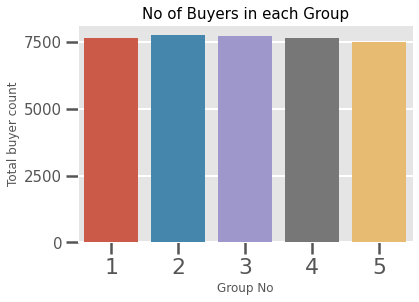

In [246]:
totalNo = usersOrder_df.groupby(['groupNo'])['Refer By'].count().reset_index()

plt.figure()
sns.barplot(x = totalNo['groupNo'], y = totalNo['Refer By'])

plt.title("No of Buyers in each Group", fontsize=15)
plt.xlabel('Group No')
plt.xticks()
plt.yticks(size=15)
plt.ylabel('Total buyer count')

plt.show()

groupNo	Ref By <br>
	1	7653 <br>
	2	7757 <br>
	3	7746 <br>
	4	7666 <br>
	5	7485 <br>


### Get group leader

In [179]:
first_group = usersOrder_df['Refer By'][usersOrder_df['groupNo'] == 1].value_counts().sort_values(ascending=[False])[:2]
sec_group = usersOrder_df['Refer By'][usersOrder_df['groupNo'] == 2].value_counts().sort_values(ascending=[False])[:2]
third_group = usersOrder_df['Refer By'][usersOrder_df['groupNo'] == 3].value_counts().sort_values(ascending=[False])[:2]
forth_group = usersOrder_df['Refer By'][usersOrder_df['groupNo'] == 4].value_counts().sort_values(ascending=[False])[:2]
fifth_group = usersOrder_df['Refer By'][usersOrder_df['groupNo'] == 5].value_counts().sort_values(ascending=[False])[:2]

first_group = first_group.drop(labels=[0])
sec_group = sec_group.drop(labels=[0])
third_group = third_group.drop(labels=[0])
forth_group = forth_group.drop(labels=[0])
fifth_group = fifth_group.drop(labels=[0])

In [168]:
k = []
v = []

k.append(first_group.keys()[0])
k.append(sec_group.keys()[0])
k.append(third_group.keys()[0])
k.append(forth_group.keys()[0])
k.append(fifth_group.keys()[0])

for i in range(1):
    v.append(first_group[k[i]])
    v.append(sec_group[k[i]])
    v.append(third_group[k[i]])
    v.append(forth_group[k[i]])
    v.append(fifth_group[k[i]])
    

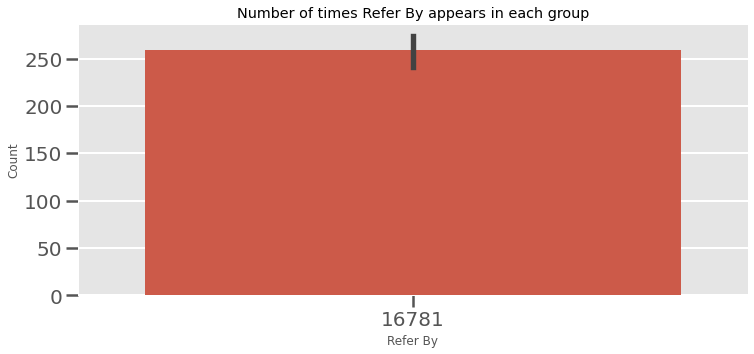

In [247]:
plt.figure(figsize=(12, 5))
sns.barplot(x = k, y = v)

plt.title("Number of times Refer By appears in each group")
plt.xlabel('Refer By')
plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel('Count')

plt.show()

Refer By ID [16781, 16781, 16781, 16781, 16781] <br>
values(No of times appear in each group) [263, 279, 224, 270, 260]
* There is only one person who dominate in each group because we are assigned group number randomly

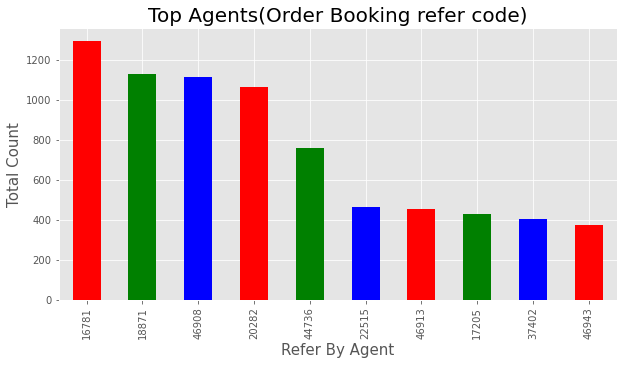

In [193]:
total_count = usersOrder_df['Refer By'].value_counts()[1:11]

plt.figure(figsize=(10, 5))
total_count.plot(kind='bar',color=['Red','green','blue'])
plt.title("Top Agents(Order Booking refer code)", size=20)
plt.xlabel('Refer By Agent', size=15)
plt.ylabel('Total Count', size=15)
plt.show()

* Top 10 Agents whose refer code is mostly used

## Q2 
What are the most prevalent reasons due to which orders get cancelled after they are
dispatched? How do you suggest we bring each of these down?


In [194]:
cancel_order = pd.read_csv('E:\Dastgyr\Data\Cancellation_Reasons_List.csv')

In [195]:
cancel_order.head()

,order_id,cancellation_reason_id,cancel_reason_text
0,188424,60,NaN
1,188420,59,NaN
2,188401,51,NaN
3,188401,53,NaN
4,188396,53,NaN


In [196]:
cancel_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   order_id                6064 non-null   int64 
 1   cancellation_reason_id  6064 non-null   int64 
 2   cancel_reason_text      3419 non-null   object
dtypes: int64(2), object(1)
memory usage: 142.2+ KB


<AxesSubplot:>

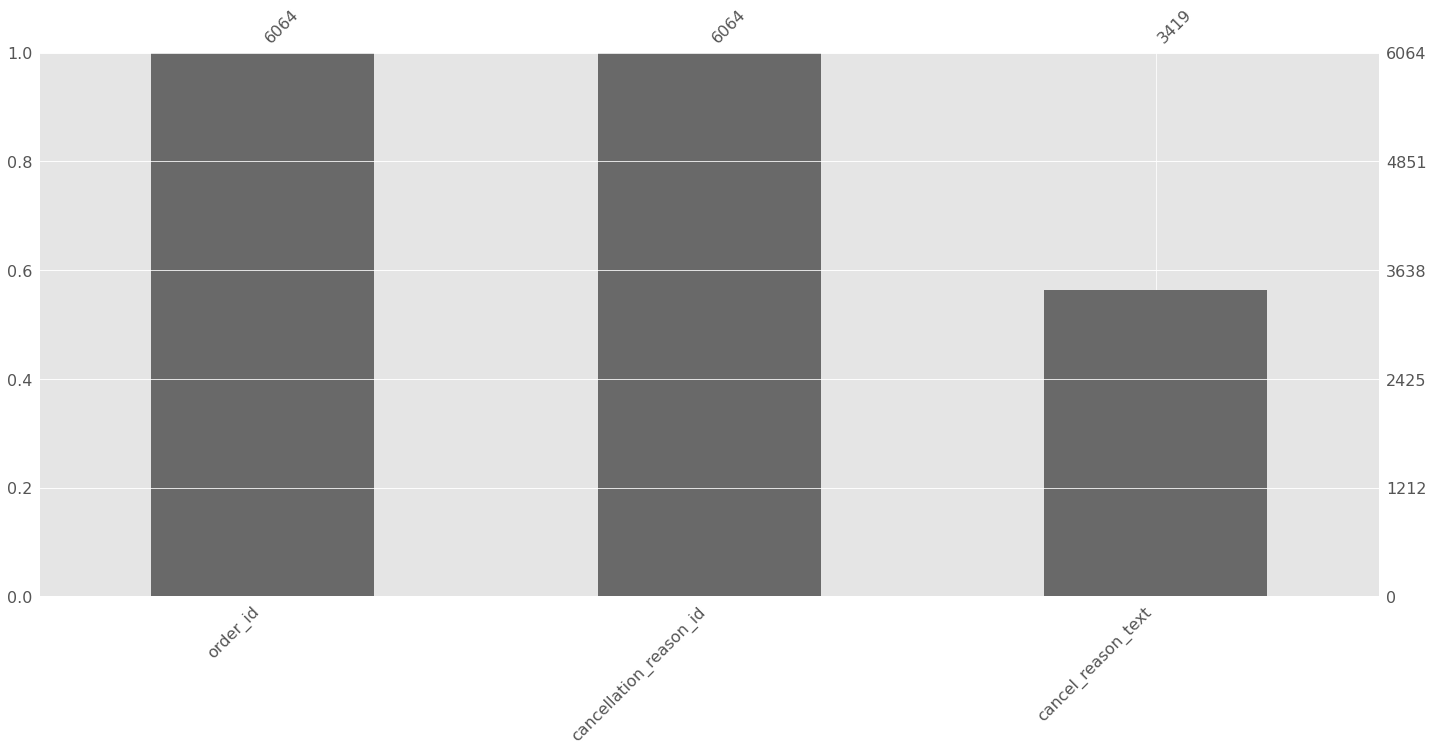

In [197]:
msno.bar(cancel_order)

In [201]:
cancel_order['cancel_reason_text'].unique()

array([nan, ' shop closed ', ' Wrong location ', ' Repeat order ',
       ' order cancel cantt pass isssue ',
       ' Wrongly Punched by customer ',
       ' customer want this order on monday so he place same order again ',
       ' fake order punch due to previous order not deliver ',
       ' order cancel due to Androon side ',
       ' fake order punch by customer ', ' inaccessible area ',
       ' some issue with salesman mobile ',
       ' Shop close due to personl issue ',
       ' Order Cancel by salesman app issue ',
       ' order Cancel  order not deliver salesman side ',
       ' Order Cancel by salesman app issu ',
       ' Some Issue With salesman Mobile  ',
       ' order cancel order not deliver by salesman side ',
       ' Actual rate is higher than what was communicated ',
       ' shop was closed ', ' Entry Pass Issue ',
       ' Not Deliver by Driver ',
       ' order cancel out of area androon side ', ' not deliver ',
       ' tech team test ', ' order cancel rate

* Reasons why order are cancelled

In [204]:
a = cancel_order['cancel_reason_text'].value_counts().sort_values(ascending=[False])[:10]
print(a)

 Shop Close                     313
 no service area                207
 No Service Area                192
 Cash Issue                     185
 Network issue                  137
 order cancel payment issue     123
 No Go Area                     105
 shop closed                     99
 Order Cancel Road Block         97
 Road Block                      89
Name: cancel_reason_text, dtype: int64


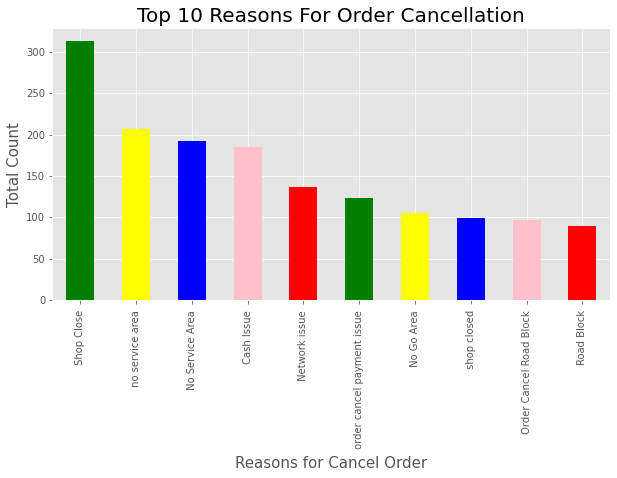

In [209]:
plt.figure(figsize=(10, 5))
a.plot(kind='bar', color=['green', 'Yellow', 'blue', 'Pink', 'Red'])
plt.title("Top 10 Reasons For Order Cancellation", size=20)
plt.xlabel('Reasons for Cancel Order', size=15)
plt.ylabel('Total Count', size=15)
plt.show()

* These are the top reasons for order getting cancel.
There are **ISSUES** like 
 1. no service area and No Service Area is same but case issue     #**SOLUTION** use lower case .lower() function in python
 2. convert Roman Urdu to english    #**SOLUTION** language translation or nlp model for translation

## Q3. 
Sometimes we face complaints from customers of incomplete orders due to some
SKUs not being in stock, in order to overcome this, which SKUs from each category
should we be prioritizing to keep in inventory at all times (so that we can
communicate this to the relevant category managers)? What’s the logic behind
choosing these specific SKUs?

In [210]:
sku_df = pd.read_csv("E:\Dastgyr\Data\SKU.csv")
prodCat = pd.read_csv("E:\Dastgyr\Data\ProductCategories.csv")

sku_df.head()

,ID,Product ID,Price,Discount,Stock,Is Active,Is Stock,Weight,Unit,All Types,Is Deal
0,87,84,720,0.0,0,True,True,NaN,NaN,NaN,False
1,3188,388,1875,0.0,0,False,False,NaN,NaN,NaN,False
2,2838,388,3750,0.0,0,False,True,NaN,NaN,NaN,False
3,2479,84,383,5.0,0,True,False,NaN,NaN,NaN,True
4,2478,84,383,5.0,0,True,False,NaN,NaN,NaN,True


In [211]:
prodCat.head()

,Category ID,Product ID
0,10,292
1,53,292
2,11,3
3,62,3
4,7,4


In [212]:
sku_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          3593 non-null   int64  
 1   Product ID  3593 non-null   int64  
 2   Price       3593 non-null   int64  
 3   Discount    3593 non-null   float64
 4   Stock       3593 non-null   int64  
 5   Is Active   3592 non-null   object 
 6   Is Stock    3593 non-null   bool   
 7   Weight      0 non-null      float64
 8   Unit        0 non-null      float64
 9   All Types   0 non-null      float64
 10  Is Deal     3593 non-null   bool   
dtypes: bool(2), float64(4), int64(4), object(1)
memory usage: 259.8+ KB


* Weight, Unit and All Types column have no value we are going drop them

In [213]:
#drop Weight, Unit and All Types columns because all values are null
sku_df.drop(["Weight", "Unit", "All Types"], axis=1, inplace=True)

<AxesSubplot:>

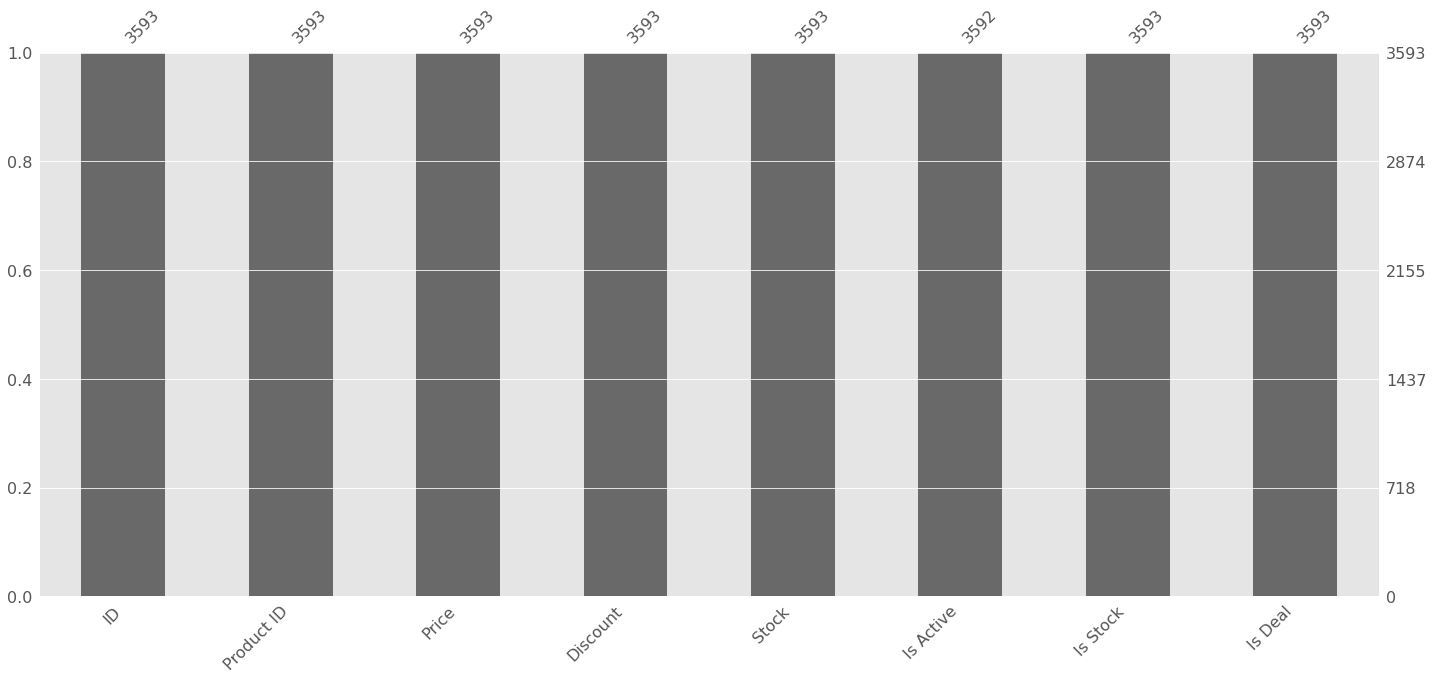

In [214]:
msno.bar(sku_df)

In [215]:
prodCat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Category ID  1772 non-null   int64
 1   Product ID   1772 non-null   int64
dtypes: int64(2)
memory usage: 27.8 KB


* There is no null value in product categories table columns

In [217]:
# Create inner join between sku and product categories table based on Product ID
sku_prodcat = pd.merge(sku_df, prodCat, on='Product ID')
sku_prodcat.head()

,ID,Product ID,Price,Discount,Stock,Is Active,Is Stock,Is Deal,Category ID
0,87,84,720,0.0,0,True,True,False,3
1,87,84,720,0.0,0,True,True,False,22
2,2479,84,383,5.0,0,True,False,True,3
3,2479,84,383,5.0,0,True,False,True,22
4,2478,84,383,5.0,0,True,False,True,3


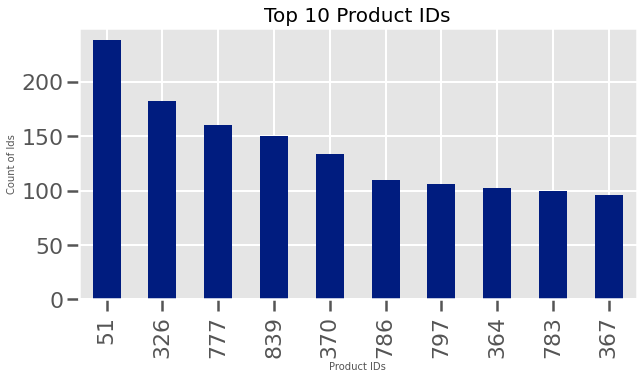

In [238]:
prod_count = sku_prodcat["Product ID"].value_counts().sort_values(ascending=[False])[:10]
plt.figure(figsize=(10, 5))
prod_count.plot(kind='bar')
plt.title("Top 10 Product IDs", size=20)
plt.xlabel('Product IDs', size=10)
plt.ylabel('Count of Ids', size=10)
plt.show()

In [232]:
print("Top 3 Category Ids against top product")
print(sku_prodcat['Category ID'][sku_prodcat["Product ID"] == 51].unique())
print(sku_prodcat['Category ID'][sku_prodcat["Product ID"] == 326].unique())
print(sku_prodcat['Category ID'][sku_prodcat["Product ID"] == 777].unique())

Top 3 Category Ids against top product
[164 172]
[12 84]
[ 3 22]


## 4. Extra EDA

In [249]:
order_df.head()

,ID,User ID,Order Number,Status,Created At,Wallet ID,Created By,Coupon ID
0,151171,911,001_1617235817562,5,2020-10-01T00:10:17.564998Z,NaN,NaN,NaN
1,151172,12255,001_1617236950240,5,2020-10-01T00:29:10.240569Z,NaN,NaN,NaN
2,151173,50075,001_1617237068661,6,2020-10-01T00:31:08.661829Z,NaN,NaN,NaN
3,151174,47559,001_1617237299995,5,2020-10-01T00:35:00.004953Z,NaN,NaN,NaN
4,151175,19306,002_1617237359398,5,2020-10-01T00:35:59.39855Z,NaN,NaN,NaN


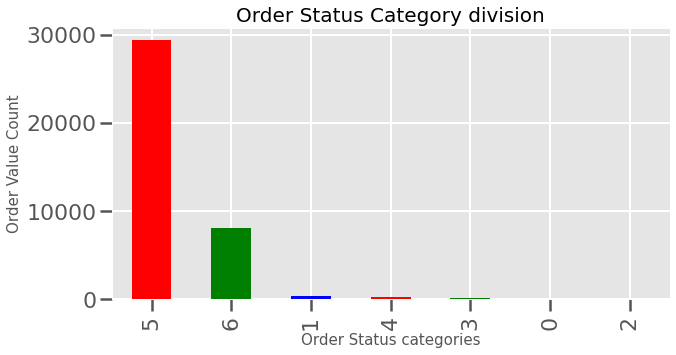

In [252]:
ord_st = order_df['Status'].value_counts()

plt.figure(figsize=(10, 5))
ord_st.plot(kind='bar',color=['Red','green','blue'])
plt.title("Order Status Category division", size=20)
plt.xlabel('Order Status categories', size=15)
plt.ylabel('Order Value Count', size=15)
plt.show()

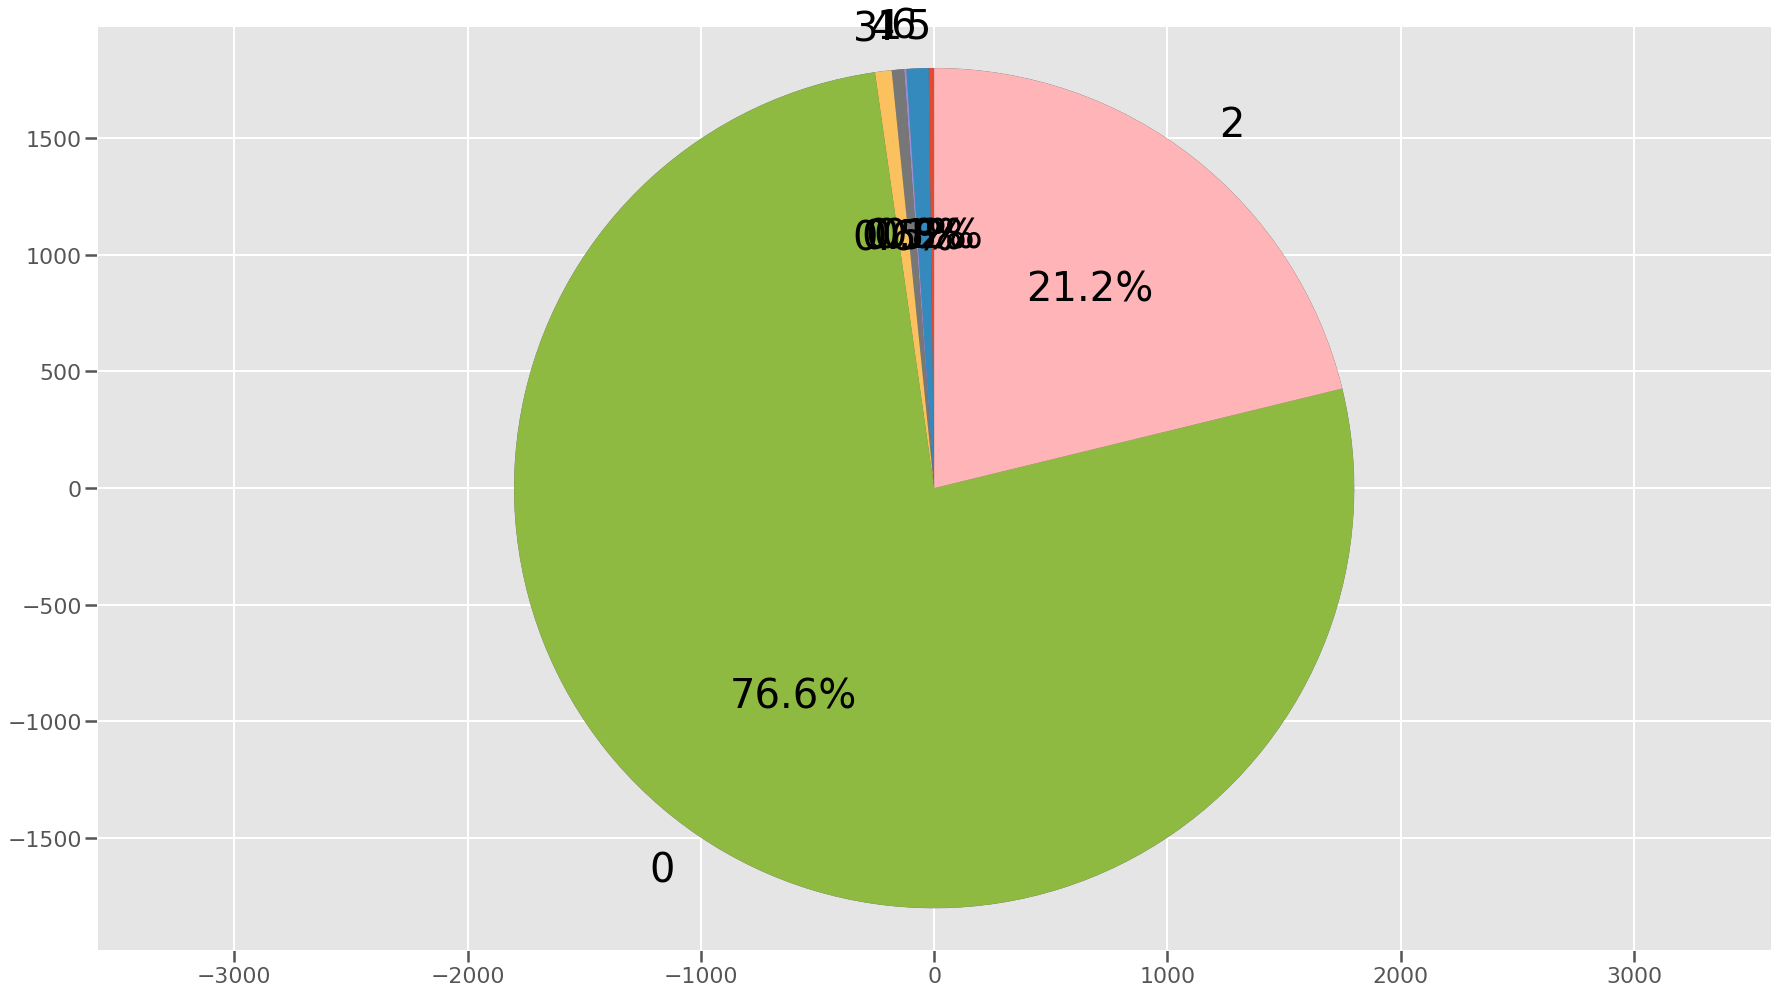

In [318]:
labels = list(ord_st.keys())
sizes = [81, 324, 33, 181, 244, 29327, 8117]
explode = (0, 0, 0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(30, 17))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=1800, frame=True, textprops={'fontsize': 40})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [292]:
list(ord_st.keys())

[5, 6, 1, 4, 3, 0, 2]

In [253]:
print('Order Status Statistics\an', ord_st)

Order Status Statistics
 5    29327
6     8117
1      324
4      244
3      181
0       81
2       33
Name: Status, dtype: int64


In [256]:
order_df['Created At'] = pd.to_datetime(order_df['Created At'])

In [264]:
order_df['date'] = order_df['Created At'].dt.day

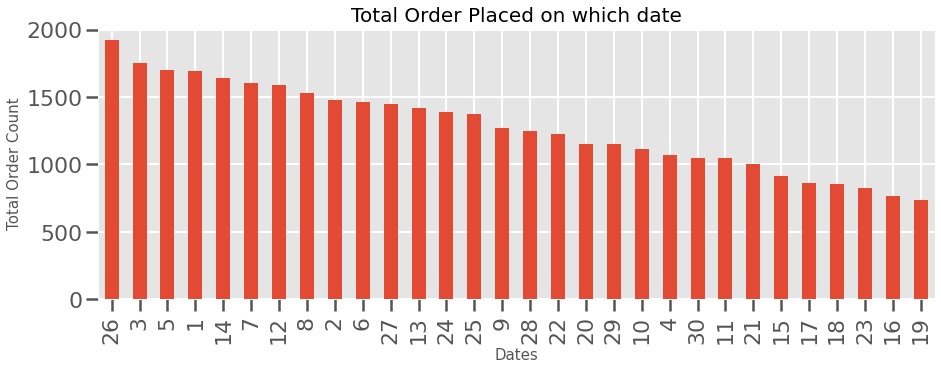

In [271]:
order_date = order_df['date'].value_counts()

plt.figure(figsize=(15, 5))
order_date.plot(kind='bar')
plt.title("Total Order Placed on which date", size=20)
plt.xlabel('Dates', size=15)
plt.ylabel('Total Order Count', size=15)
plt.show()


In [277]:
users_df['Created At'] = pd.to_datetime(users_df['Created At'])
users_df['month'] = users_df['Created At'].dt.month

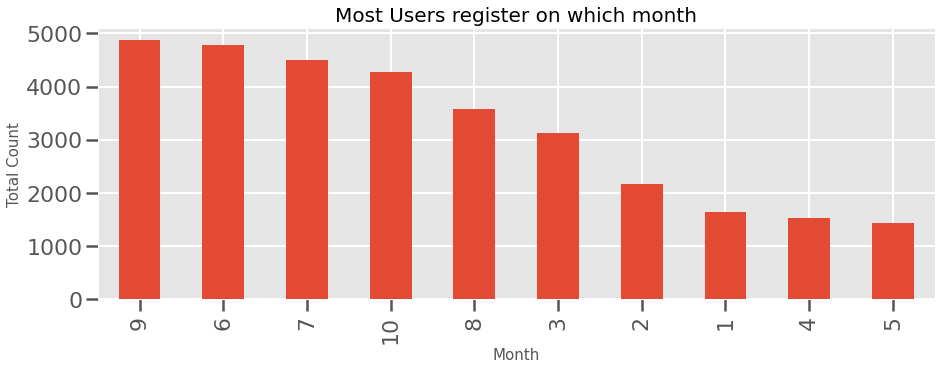

In [279]:
month = users_df['month'].value_counts()

plt.figure(figsize=(15, 5))
month.plot(kind='bar')
plt.title("Most Users register on which month", size=20)
plt.xlabel('Month', size=15)
plt.ylabel('Total Count', size=15)
plt.show()